In [38]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# create a random matrix of size n x m with the rank <= k <= min(n, m).
def create_random_matrix(n: int, m: int, k: int) -> np.ndarray:
    if k > min(n, m):
        raise ValueError("k must be less than or equal to min(n, m)")
    a = np.random.randn(n, k)
    b = np.random.randn(k, m)
    return np.dot(a, b)

In [40]:
# perform LU decomposition on a random matrix of rank k <= min(n, m).
# check that the product of L and U is equal to the original matrix.
# check that the rank of L and U is equal to k.
def test_lu_decomposition(n: int, m: int, k: int):
    a = create_random_matrix(n, m, k)
    
    p, l, u = sp.linalg.lu(a)

    error = np.linalg.norm(a - p@l@u)
    rank_l = np.linalg.matrix_rank(l)
    rank_u = np.linalg.matrix_rank(u)

    assert rank_u == k, f"Rank of U is not equal to {k} ({rank_u})"
    # check whether error is small enough using the machine epsilon
    assert error <= n * m * np.finfo(float).eps, f"Error is too large ({error})"

    return a, p, l, u, error

In [41]:
n=10
m=10
k=5
n_repeats = 10

# test LU decomposition with n, m and k for n_repeats times.
# collect LU decomposition errors and the ranks of U.
errors = []
ranks = []

for i in range(n_repeats):
    a, p, l, u, error = test_lu_decomposition(n, m, k)
    errors.append(error)
    ranks.append(np.linalg.matrix_rank(u))

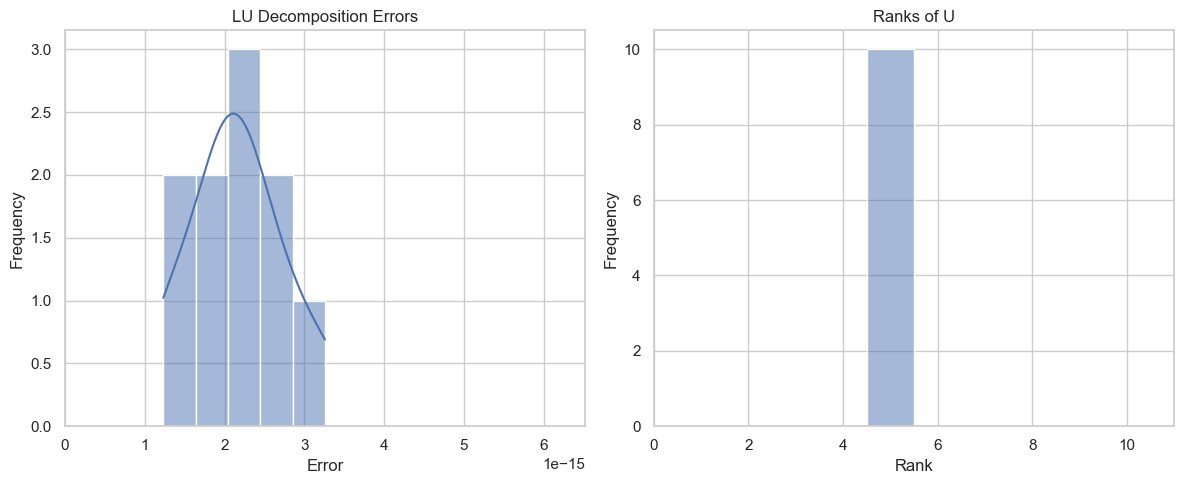

In [50]:
# plot the LU decomposition errors and the ranks of U as histograms.
# make the histogram visually pleasing.
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(errors, kde=True, ax=axs[0])
axs[0].set_title("LU Decomposition Errors")
axs[0].set_xlabel("Error")
axs[0].set_ylabel("Frequency")
axs[0].set_xlim([0, np.max(errors) * 2.])

sns.histplot(ranks, kde=True, ax=axs[1])
axs[1].set_title("Ranks of U")
axs[1].set_xlabel("Rank")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim(0, np.max([n, m])+1)
plt.tight_layout()
plt.show()

In [ ]:
# print out the final LU decomposition result in a pretty format.
print("Original matrix A:")
print(np.array2string(a, precision=2, suppress_small=True))
print("\nPermutation matrix P:")
print(np.array2string(p, precision=2, suppress_small=True))
print("\nLower triangular matrix L:")
print(np.array2string(l, precision=2, suppress_small=True))
print("\nUpper triangular matrix U:")
print(np.array2string(u, precision=2, suppress_small=True))
print(f"\nLU decomposition error: {error:.3e}")
print(f"Rank of A: {np.linalg.matrix_rank(a)}")
print(f"Rank of L: {np.linalg.matrix_rank(l)}")
print(f"Rank of U: {np.linalg.matrix_rank(u)}")

Original matrix A:
[[ 1.642 -0.449 -3.83   1.687  0.404  0.713 -5.513  0.794 -0.873  3.314]
 [-0.602  0.646 -0.069  0.536  2.751  3.78  -1.93  -0.861  1.608  0.837]
 [-1.317 -7.708  5.304  4.37  -3.951 -4.814  2.495  2.68   2.996  3.991]
 [ 0.817  3.555  0.417 -3.004 -1.624 -0.284  1.703  0.66  -3.714 -1.3  ]
 [ 1.588 -0.201 -0.934  1.696  1.115  2.843 -4.513  0.955 -0.643  4.289]
 [-3.634 -0.481 -2.471  0.457  0.03  -0.167 -2.083 -0.127  2.741 -0.493]
 [ 2.107  2.009 -0.349 -0.704  3.346  3.316 -0.276 -1.864 -0.478 -1.076]
 [-1.554 -3.782 -2.447  2.626 -1.726 -3.289 -2.489  0.984  2.211  1.632]
 [-0.706 -5.517 -0.394  3.776 -2.762 -4.001 -1.949  2.02   1.943  3.595]
 [ 1.428  3.587  3.982 -3.059 -1.904  0.957  3.313  1.407 -4.439  0.112]]

Permutation matrix P:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 